In [20]:
import yaml
import numpy as np
import pandas as pd
from tabulate import tabulate

In [21]:
results = \
    pd.read_csv("../results/mcmc_exp.csv", header=None)


results.columns = ["timestamp", "config", "precision", "recall", "f1_score"]
results.head()

,timestamp,config,precision,recall,f1_score
0,2023-11-07 17:26:33.967196,config/exp/catboost_10.yml,0.92237,0.93,0.92401
1,2023-11-07 17:26:47.315387,config/exp/catboost_10.yml,0.91308,0.92,0.91573
2,2023-11-07 17:27:00.613036,config/exp/catboost_10.yml,0.92142,0.93,0.92142
3,2023-11-07 17:27:13.996694,config/exp/catboost_10.yml,0.91308,0.92,0.91573
4,2023-11-07 17:27:27.468049,config/exp/catboost_10.yml,0.92431,0.93,0.92626


In [22]:
def _parse_cfg(config):
    with open(f"../{config}") as f:
        tmp = yaml.safe_load(f)
    return tmp

def parse_clf(config):
    _config = _parse_cfg(config)
    clf = _config["mcmc"]["classifier"]
    return clf

def parse_ratio(config):
    _config = _parse_cfg(config)
    clf = _config["mcmc"]["ratio"]
    return clf

results["classifier"] = results.config.apply(parse_clf)
results["ratio"] = results.config.apply(parse_ratio)

In [23]:
results.head()

,timestamp,config,precision,recall,f1_score,classifier,ratio
0,2023-11-07 17:26:33.967196,config/exp/catboost_10.yml,0.92237,0.93,0.92401,catboost,10
1,2023-11-07 17:26:47.315387,config/exp/catboost_10.yml,0.91308,0.92,0.91573,catboost,10
2,2023-11-07 17:27:00.613036,config/exp/catboost_10.yml,0.92142,0.93,0.92142,catboost,10
3,2023-11-07 17:27:13.996694,config/exp/catboost_10.yml,0.91308,0.92,0.91573,catboost,10
4,2023-11-07 17:27:27.468049,config/exp/catboost_10.yml,0.92431,0.93,0.92626,catboost,10


In [31]:
rs = pd.pivot_table(
    results,
    index = ["classifier"],
    columns = ["ratio"],
    values = "f1_score",
    # aggfunc= lambda x: f"{np.mean(x) : .3f}{np.std(x) : .3f}"
)

rs

ratio,1,2,3,4,5,6,7,8,9,10
classifier,,,,,,,,,,
catboost,0.830235,0.870449,0.864765,0.878075,0.898636,0.896278,0.906361,0.911649,0.913963,0.922542
decision_tree,0.823204,0.790641,0.811649,0.810954,0.837691,0.838475,0.844511,0.853214,0.875469,0.869121
gbc,0.828305,0.861817,0.869271,0.877426,0.885561,0.896384,0.898289,0.903100,0.903115,0.914108
knn,0.754990,0.753304,0.733030,0.787597,0.770229,0.798853,0.805620,0.817835,0.819481,0.841721
lr,0.810176,0.841135,0.846478,0.845094,0.868380,0.886476,0.883876,0.897194,0.890285,0.904657
mlp,0.819945,0.817370,0.804085,0.821923,0.869113,0.875939,0.864233,0.866577,0.874151,0.899941
svm,0.820265,0.848511,0.846161,0.846831,0.881259,0.873510,0.868728,0.880783,0.881015,0.903231


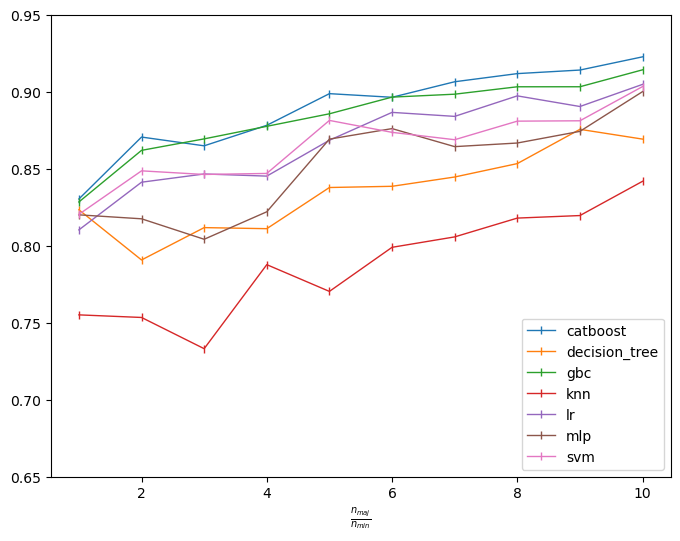

In [79]:
# rs.loc["catboost"].plot(leg)
# rs.loc["gbc"].plot()
# rs.loc["lr"].plot()
# rs.loc["knn"].plot()
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [8, 6]
for clf in rs.index:
    rs.loc[clf].plot(label=clf, lw=1, marker="|")

plt.xlabel(r'$\frac{n_{maj}}{n_{min}}$')
plt.ylim(.65, .95)
plt.legend(loc=4)